In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import mlflow.tensorflow
from plot_keras_history import show_history
from tensorflow import keras
from keras import layers
from keras.layers import Dropout
from keras import regularizers

# Set MLflow tracking URI
mlflow.set_tracking_uri("http://localhost:8080")

In [2]:
def load_mnist_data():
    return keras.datasets.mnist.load_data()

def preprocess_data(X_train, Y_train, X_test, Y_test):
    num_classes = 10
    x_train = X_train.reshape(60000, 784).astype('float32') / 255
    x_test = X_test.reshape(10000, 784).astype('float32') / 255
    y_train = keras.utils.to_categorical(Y_train, num_classes)
    y_test = keras.utils.to_categorical(Y_test, num_classes)
    return x_train, y_train, x_test, y_test

def basic_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(20, activation='sigmoid', input_shape=(784,)),
        layers.Dense(20, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    train_and_log_experiment(model, "Basic NN", x_train, y_train, x_test, y_test)

def bigger_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='sigmoid', input_shape=(784,)),
        layers.Dense(128, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    train_and_log_experiment(model, "Bigger NN", x_train, y_train, x_test, y_test)

def kernel_reg_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)),
        layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    train_and_log_experiment(model, "Kernel-reg NN", x_train, y_train, x_test, y_test, epochs=50)

def dropout_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='sigmoid', input_shape=(784,)),
        Dropout(0.7),
        layers.Dense(128, activation='sigmoid'),
        Dropout(0.6),
        layers.Dense(10, activation='softmax')
    ])
    train_and_log_experiment(model, "Dropout NN", x_train, y_train, x_test, y_test)

def early_stop_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='sigmoid', input_shape=(784,)),
        layers.Dense(128, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[es])
    mlflow.tensorflow.autolog()
    show_history(history)

def lr_nn_experiment(x_train, y_train, x_test, y_test, lr=0.1):
    model = keras.Sequential([
        layers.Dense(20, activation='sigmoid', input_shape=(784,)),
        layers.Dense(10, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    opt_new = keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    train_and_log_experiment(model, f"LR {lr} NN", x_train, y_train, x_test, y_test)

def momentum_nn_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(20, activation='sigmoid', input_shape=(784,)),
        layers.Dense(10, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    opt_new = keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
    model.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    train_and_log_experiment(model, "Opt LR & Momentum NN", x_train, y_train, x_test, y_test)

def mini_batch_sgd_experiment(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        layers.Dense(20, activation='sigmoid', input_shape=(784,)),
        layers.Dense(10, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    opt_new = keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    train_and_log_experiment(model, "Mini-batch SGD NN", x_train, y_train, x_test, y_test, batch_size=512)

def train_and_log_experiment(model, run_name, x_train, y_train, x_test, y_test, epochs=10, batch_size=None):
    with mlflow.start_run(run_name=run_name, nested=True):
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        mlflow.tensorflow.autolog()

        loss, acc = model.evaluate(x_test, y_test, verbose=2)
        print("Test accuracy: {:5.2f}%".format(100 * acc))
        loss, acc = model.evaluate(x_train, y_train, verbose=2)
        print("Train accuracy: {:5.2f}%".format(100 * acc))

        show_history(history)


In [3]:
(X_train, Y_train), (X_test, Y_test) = load_mnist_data()
x_train, y_train, x_test, y_test = preprocess_data(X_train, Y_train, X_test, Y_test)

/opt/anaconda3/envs/ass2env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.6476 - loss: 1.4868 - val_accuracy: 0.8868 - val_loss: 0.4357
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.8937 - loss: 0.3930 - val_accuracy: 0.9153 - val_loss: 0.2955
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.9200 - loss: 0.2829 - val_accuracy: 0.9307 - val_loss: 0.2406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.9296 - loss: 0.2428 - val_accuracy: 0.9361 - val_loss: 0.2172
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - accuracy: 0.9377 - loss: 0.2138 - val_accuracy: 0.9402 - val_loss: 0.2052
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.9446 - loss: 0.1875 - val_accuracy: 0.9429 - val_loss: 0.1937
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 308us/step - accuracy: 0.9476 - loss: 0.1782 - val_accuracy: 0.9424 - val_loss: 0.1919
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.9521 -

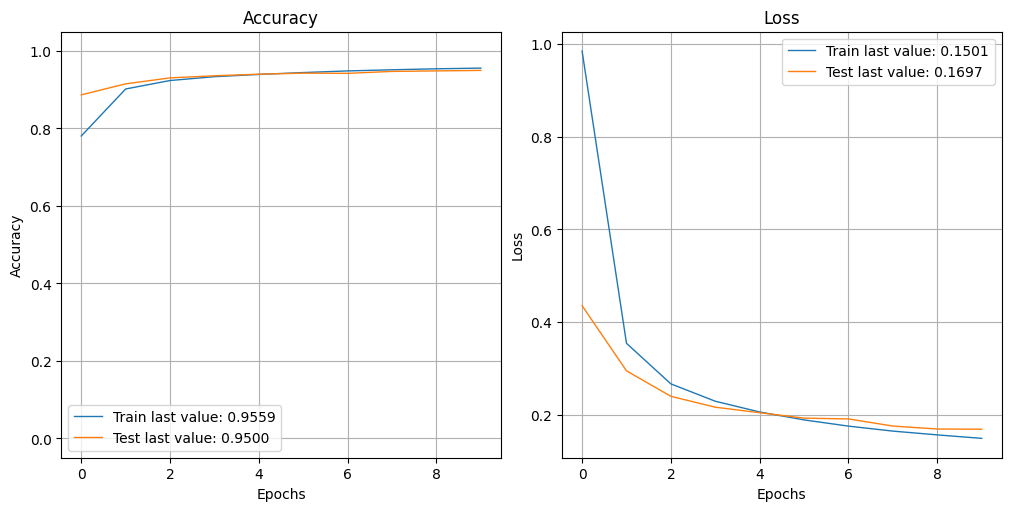

In [4]:
basic_nn_experiment(x_train, y_train, x_test, y_test)

/opt/anaconda3/envs/ass2env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1830/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8034 - loss: 0.7126

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8055 - loss: 0.7049 - val_accuracy: 0.9353 - val_loss: 0.2068
Epoch 2/10
1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9432 - loss: 0.1906

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9433 - loss: 0.1902 - val_accuracy: 0.9517 - val_loss: 0.1529
Epoch 3/10
1841/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9605 - loss: 0.1310

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9606 - loss: 0.1308 - val_accuracy: 0.9653 - val_loss: 0.1150
Epoch 4/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.0957  

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9706 - loss: 0.0957 - val_accuracy: 0.9683 - val_loss: 0.0974
Epoch 5/10
1832/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9776 - loss: 0.0719

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0720 - val_accuracy: 0.9732 - val_loss: 0.0922
Epoch 6/10
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.0591

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0591 - val_accuracy: 0.9756 - val_loss: 0.0816
Epoch 7/10
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9849 - loss: 0.0486

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9849 - loss: 0.0487 - val_accuracy: 0.9777 - val_loss: 0.0772
Epoch 8/10
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0404

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9801 - val_loss: 0.0704
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.9788 - val_loss: 0.0753
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9908 - loss: 0.0293

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0293 - val_accuracy: 0.9797 - val_loss: 0.0731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 - 0s - 391us/step - accuracy: 0.9797 - loss: 0.0731
Test accuracy: 97.97%
1875/1875 - 1s - 347us/step - accuracy: 0.9941 - loss: 0.0199
Train accuracy: 99.41%


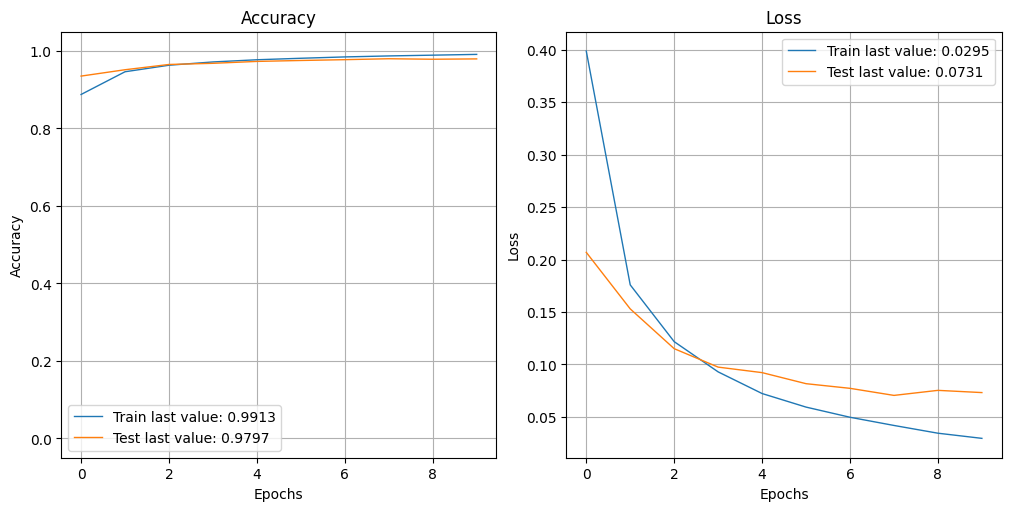

In [5]:
bigger_nn_experiment(x_train, y_train, x_test, y_test)

Epoch 1/50
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5329 - loss: 2.3370

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5342 - loss: 2.3293 - val_accuracy: 0.7688 - val_loss: 1.3874
Epoch 2/50
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7238 - loss: 1.3974

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7239 - loss: 1.3970 - val_accuracy: 0.7636 - val_loss: 1.2705
Epoch 3/50
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 1.2729

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7541 - loss: 1.2727 - val_accuracy: 0.7619 - val_loss: 1.1807
Epoch 4/50
1841/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7536 - loss: 1.2216

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7537 - loss: 1.2213 - val_accuracy: 0.7852 - val_loss: 1.1303
Epoch 5/50
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7648 - loss: 1.1822

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7648 - loss: 1.1820 - val_accuracy: 0.7919 - val_loss: 1.1172
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7695 - loss: 1.1420 - val_accuracy: 0.7722 - val_loss: 1.1303
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7766 - loss: 1.1136 - val_accuracy: 0.7533 - val_loss: 1.1596
Epoch 8/50
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7876 - loss: 1.0773

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7876 - loss: 1.0773 - val_accuracy: 0.7734 - val_loss: 1.0996
Epoch 9/50
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.7946 - loss: 1.0610

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7947 - loss: 1.0609 - val_accuracy: 0.8092 - val_loss: 0.9967
Epoch 10/50
1829/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 1.0216

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8078 - loss: 1.0214 - val_accuracy: 0.8280 - val_loss: 0.9539
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8179 - loss: 0.9952 - val_accuracy: 0.7830 - val_loss: 1.0152
Epoch 12/50
1844/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.9704

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8217 - loss: 0.9703 - val_accuracy: 0.8269 - val_loss: 0.9325
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8268 - loss: 0.9522 - val_accuracy: 0.7994 - val_loss: 1.0011
Epoch 14/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8299 - loss: 0.9367

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8299 - loss: 0.9367 - val_accuracy: 0.8348 - val_loss: 0.8914
Epoch 15/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8312 - loss: 0.9112 - val_accuracy: 0.8271 - val_loss: 0.9178
Epoch 16/50
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.9011

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8345 - loss: 0.9011 - val_accuracy: 0.8507 - val_loss: 0.8631
Epoch 17/50
1842/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.8894

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8360 - loss: 0.8894 - val_accuracy: 0.8530 - val_loss: 0.8414
Epoch 18/50
1851/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.8824

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8380 - loss: 0.8823 - val_accuracy: 0.8612 - val_loss: 0.8286
Epoch 19/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8399 - loss: 0.8688 - val_accuracy: 0.8476 - val_loss: 0.8539
Epoch 20/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8387 - loss: 0.8636 - val_accuracy: 0.8357 - val_loss: 0.8742
Epoch 21/50
1845/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8412 - loss: 0.8529

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8412 - loss: 0.8530 - val_accuracy: 0.8511 - val_loss: 0.8195
Epoch 22/50
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8430 - loss: 0.8443

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8430 - loss: 0.8443 - val_accuracy: 0.8605 - val_loss: 0.7964
Epoch 23/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.8441 - val_accuracy: 0.8256 - val_loss: 0.8634
Epoch 24/50
1848/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8457 - loss: 0.8310

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8457 - loss: 0.8310 - val_accuracy: 0.8597 - val_loss: 0.8003
Epoch 25/50
1829/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.8240

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8476 - loss: 0.8239 - val_accuracy: 0.8598 - val_loss: 0.7865
Epoch 26/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8463 - loss: 0.8253 - val_accuracy: 0.8131 - val_loss: 0.8946
Epoch 27/50
1834/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8477 - loss: 0.8112

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8478 - loss: 0.8112 - val_accuracy: 0.8715 - val_loss: 0.7600
Epoch 28/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8482 - loss: 0.8088 - val_accuracy: 0.8592 - val_loss: 0.7692
Epoch 29/50
1840/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8531 - loss: 0.7953

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8531 - loss: 0.7953 - val_accuracy: 0.8749 - val_loss: 0.7431
Epoch 30/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8492 - loss: 0.7966 - val_accuracy: 0.8352 - val_loss: 0.8055
Epoch 31/50
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.7882

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8511 - loss: 0.7882 - val_accuracy: 0.8627 - val_loss: 0.7502
Epoch 32/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8499 - loss: 0.7851 - val_accuracy: 0.8639 - val_loss: 0.7503
Epoch 33/50
1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8531 - loss: 0.7776

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8531 - loss: 0.7775 - val_accuracy: 0.8671 - val_loss: 0.7426
Epoch 34/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8555 - loss: 0.7705 - val_accuracy: 0.8665 - val_loss: 0.7480
Epoch 35/50
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.7678

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.7678 - val_accuracy: 0.8662 - val_loss: 0.7280
Epoch 36/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.7617 - val_accuracy: 0.8633 - val_loss: 0.7496
Epoch 37/50
1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.7543

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8576 - loss: 0.7544 - val_accuracy: 0.8731 - val_loss: 0.7164
Epoch 38/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8568 - loss: 0.7577 - val_accuracy: 0.8491 - val_loss: 0.7582
Epoch 39/50
1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.7539

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.7538 - val_accuracy: 0.8746 - val_loss: 0.7186
Epoch 40/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8566 - loss: 0.7511 - val_accuracy: 0.8681 - val_loss: 0.7198
Epoch 41/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.7355 - val_accuracy: 0.8583 - val_loss: 0.7360
Epoch 42/50
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.7404

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8584 - loss: 0.7404 - val_accuracy: 0.8739 - val_loss: 0.7007
Epoch 43/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.7333

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8632 - loss: 0.7333 - val_accuracy: 0.8812 - val_loss: 0.6949
Epoch 44/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.7351 - val_accuracy: 0.8678 - val_loss: 0.7195
Epoch 45/50
1851/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.7302

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.7302 - val_accuracy: 0.8705 - val_loss: 0.7084
Epoch 46/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8640 - loss: 0.7256 - val_accuracy: 0.8684 - val_loss: 0.7243
Epoch 47/50
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.7224

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8662 - loss: 0.7224 - val_accuracy: 0.8745 - val_loss: 0.6927
Epoch 48/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8643 - loss: 0.7228 - val_accuracy: 0.8712 - val_loss: 0.7052
Epoch 49/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8676 - loss: 0.7156 - val_accuracy: 0.8677 - val_loss: 0.7058
Epoch 50/50
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.7074

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.7075 - val_accuracy: 0.8808 - val_loss: 0.6853
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 - 0s - 419us/step - accuracy: 0.8808 - loss: 0.6853
Test accuracy: 88.08%
1875/1875 - 1s - 377us/step - accuracy: 0.8752 - loss: 0.6973
Train accuracy: 87.52%


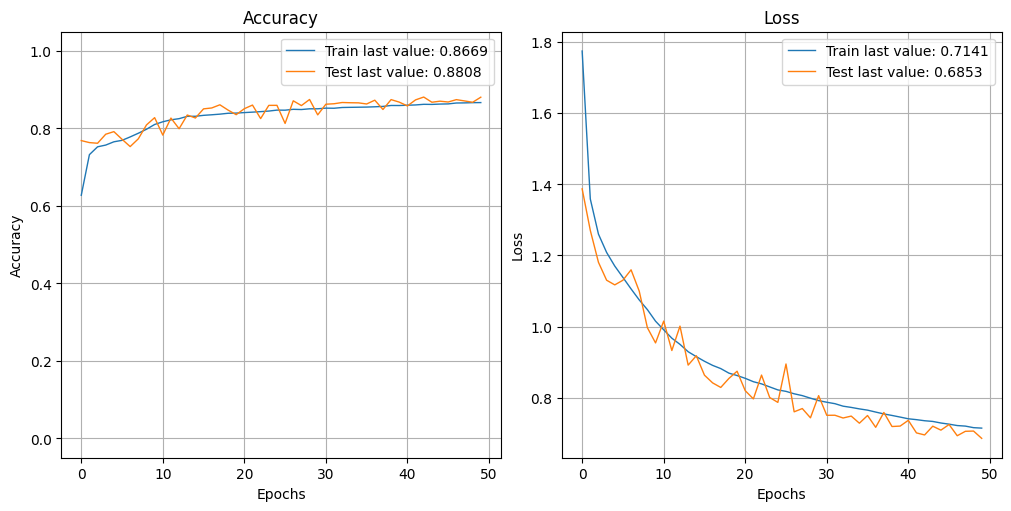

In [6]:
kernel_reg_nn_experiment(x_train, y_train, x_test, y_test)

Epoch 1/10
1838/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5474 - loss: 1.3346

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5509 - loss: 1.3250 - val_accuracy: 0.9133 - val_loss: 0.2999
Epoch 2/10
1835/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.4670

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.4665 - val_accuracy: 0.9247 - val_loss: 0.2498
Epoch 3/10
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8901 - loss: 0.3874

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.3872 - val_accuracy: 0.9377 - val_loss: 0.2157
Epoch 4/10
1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.3493

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9014 - loss: 0.3492 - val_accuracy: 0.9448 - val_loss: 0.1941
Epoch 5/10
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9105 - loss: 0.3178

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9105 - loss: 0.3178 - val_accuracy: 0.9492 - val_loss: 0.1793
Epoch 6/10
1845/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.3053

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9170 - loss: 0.3053 - val_accuracy: 0.9524 - val_loss: 0.1705
Epoch 7/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9224 - loss: 0.2915

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9224 - loss: 0.2915 - val_accuracy: 0.9532 - val_loss: 0.1660
Epoch 8/10
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9266 - loss: 0.2781

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9266 - loss: 0.2782 - val_accuracy: 0.9552 - val_loss: 0.1605
Epoch 9/10
1844/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9263 - loss: 0.2779

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9263 - loss: 0.2777 - val_accuracy: 0.9590 - val_loss: 0.1551
Epoch 10/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9306 - loss: 0.2715

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9306 - loss: 0.2715 - val_accuracy: 0.9596 - val_loss: 0.1478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 - 0s - 445us/step - accuracy: 0.9596 - loss: 0.1478
Test accuracy: 95.96%
1875/1875 - 1s - 375us/step - accuracy: 0.9616 - loss: 0.1388
Train accuracy: 96.16%


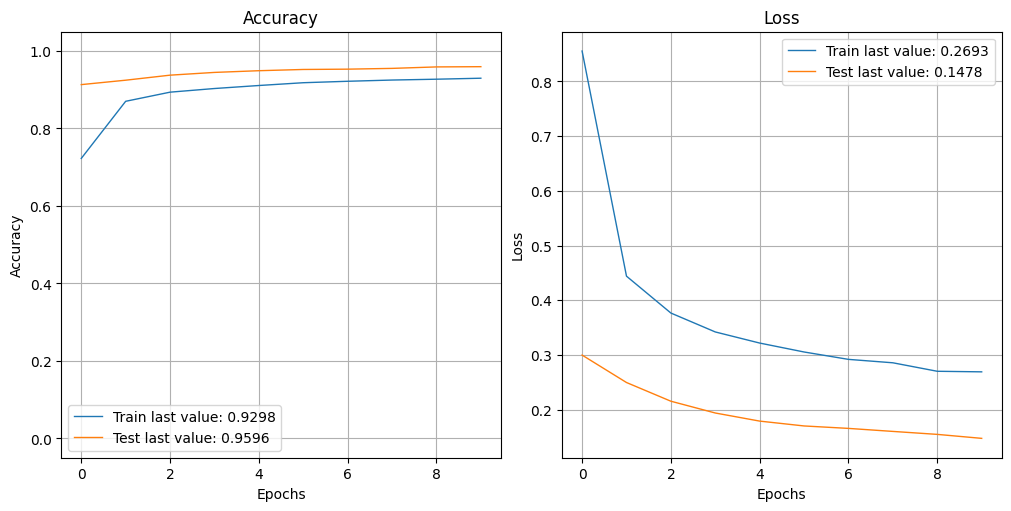

In [7]:
dropout_nn_experiment(x_train, y_train, x_test, y_test)

2024/05/08 10:26:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '336e9866c54642849f17bda6a8a18b91', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.7096

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8038 - loss: 0.7068 - val_accuracy: 0.9391 - val_loss: 0.2061
Epoch 2/10
1831/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9424 - loss: 0.1899

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9425 - loss: 0.1895 - val_accuracy: 0.9556 - val_loss: 0.1426
Epoch 3/10
1840/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9620 - loss: 0.1249

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9620 - loss: 0.1248 - val_accuracy: 0.9644 - val_loss: 0.1151
Epoch 4/10
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.9702 - loss: 0.0956

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9703 - loss: 0.0955 - val_accuracy: 0.9661 - val_loss: 0.1066
Epoch 5/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9767 - loss: 0.0770

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.0770 - val_accuracy: 0.9740 - val_loss: 0.0823
Epoch 6/10
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.9812 - loss: 0.0606

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9812 - loss: 0.0606 - val_accuracy: 0.9759 - val_loss: 0.0781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


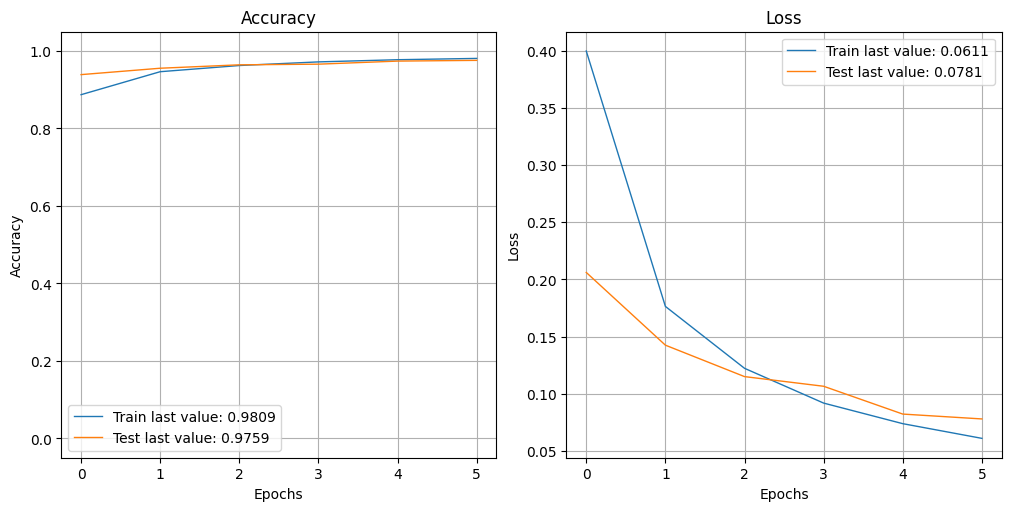

In [8]:
early_stop_nn_experiment(x_train, y_train, x_test, y_test)

Epoch 1/10
1820/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.5614 - loss: 1.7090

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.5660 - loss: 1.6952 - val_accuracy: 0.8635 - val_loss: 0.6104
Epoch 2/10
1772/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8678 - loss: 0.5421

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8683 - loss: 0.5388 - val_accuracy: 0.8982 - val_loss: 0.3854
Epoch 3/10
1774/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9009 - loss: 0.3730

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9010 - loss: 0.3720 - val_accuracy: 0.9154 - val_loss: 0.3157
Epoch 4/10
1851/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.9165 - loss: 0.3023

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.9165 - loss: 0.3022 - val_accuracy: 0.9244 - val_loss: 0.2731
Epoch 5/10
1799/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9290 - loss: 0.2613

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.9291 - loss: 0.2610 - val_accuracy: 0.9320 - val_loss: 0.2438
Epoch 6/10
1758/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9379 - loss: 0.2308

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9378 - loss: 0.2307 - val_accuracy: 0.9371 - val_loss: 0.2292
Epoch 7/10
1831/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9433 - loss: 0.2119

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9432 - loss: 0.2118 - val_accuracy: 0.9402 - val_loss: 0.2098
Epoch 8/10
1772/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9447 - loss: 0.2001

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.9448 - loss: 0.1999 - val_accuracy: 0.9387 - val_loss: 0.2087
Epoch 9/10
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9491 - loss: 0.1870

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.9491 - loss: 0.1870 - val_accuracy: 0.9455 - val_loss: 0.1904
Epoch 10/10
1770/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9509 - loss: 0.1780

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9509 - loss: 0.1780 - val_accuracy: 0.9478 - val_loss: 0.1849


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 - 0s - 240us/step - accuracy: 0.9478 - loss: 0.1849
Test accuracy: 94.78%
1875/1875 - 0s - 209us/step - accuracy: 0.9547 - loss: 0.1649
Train accuracy: 95.47%


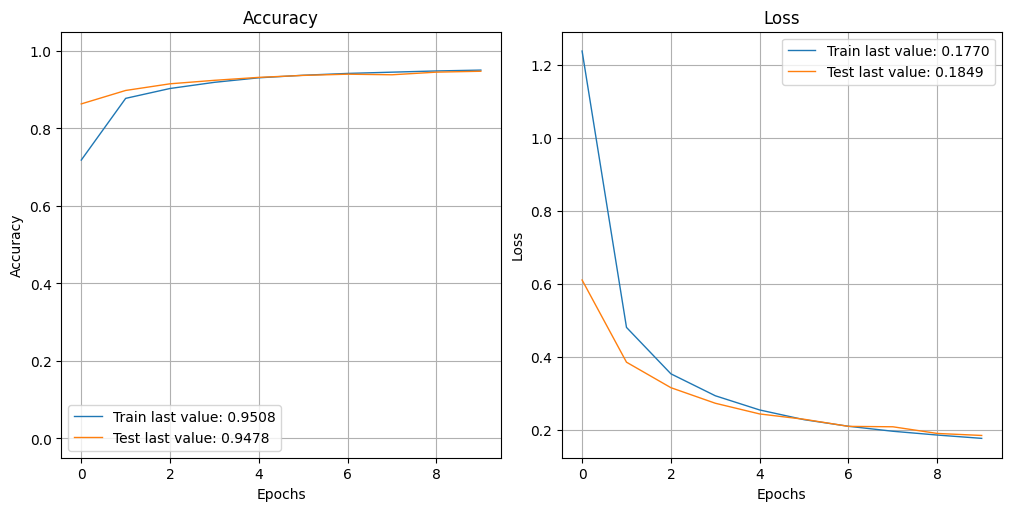

In [9]:
lr_nn_experiment(x_train, y_train, x_test, y_test)

Epoch 1/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.4983 - loss: 1.6865

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.4995 - loss: 1.6835 - val_accuracy: 0.8597 - val_loss: 0.6512
Epoch 2/10
1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8745 - loss: 0.5559

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8747 - loss: 0.5548 - val_accuracy: 0.9088 - val_loss: 0.3611
Epoch 3/10
1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9126 - loss: 0.3426

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.9126 - loss: 0.3422 - val_accuracy: 0.9232 - val_loss: 0.2854
Epoch 4/10
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9253 - loss: 0.2773

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9253 - loss: 0.2771 - val_accuracy: 0.9316 - val_loss: 0.2534
Epoch 5/10
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9339 - loss: 0.2411

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9340 - loss: 0.2410 - val_accuracy: 0.9327 - val_loss: 0.2360
Epoch 6/10
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9387 - loss: 0.2191

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.9387 - loss: 0.2191 - val_accuracy: 0.9377 - val_loss: 0.2188
Epoch 7/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9442 - loss: 0.2015

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.9442 - loss: 0.2015 - val_accuracy: 0.9397 - val_loss: 0.2099
Epoch 8/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9458 - loss: 0.1909

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.9458 - loss: 0.1909 - val_accuracy: 0.9432 - val_loss: 0.2009
Epoch 9/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9483 - loss: 0.1816

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9483 - loss: 0.1816 - val_accuracy: 0.9454 - val_loss: 0.1910
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9505 - loss: 0.1761 - val_accuracy: 0.9451 - val_loss: 0.1915


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 - 0s - 242us/step - accuracy: 0.9451 - loss: 0.1915
Test accuracy: 94.51%
1875/1875 - 0s - 205us/step - accuracy: 0.9535 - loss: 0.1647
Train accuracy: 95.35%


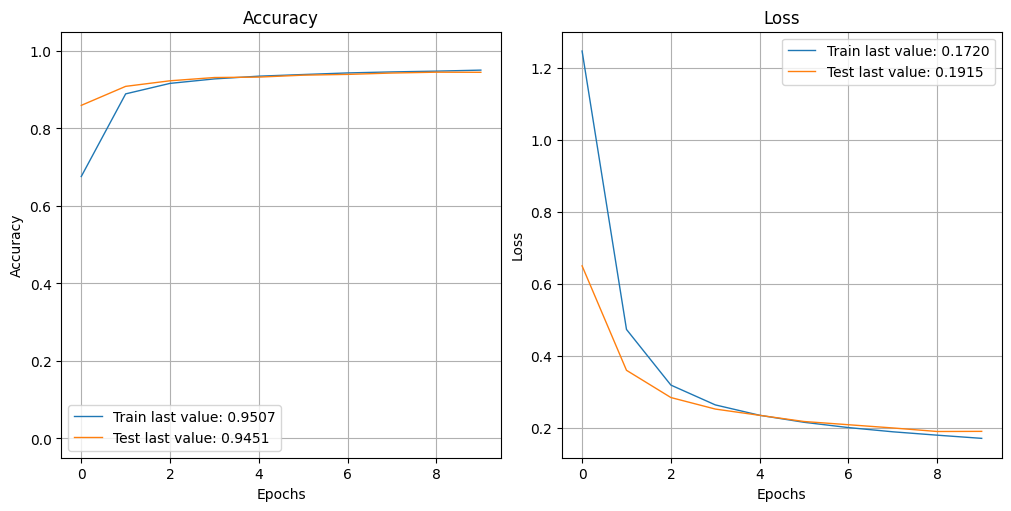

In [10]:
lr_nn_experiment(x_train, y_train, x_test, y_test, lr=0.0001)

Epoch 1/10
1786/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.5574 - loss: 1.6611

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.5653 - loss: 1.6389 - val_accuracy: 0.8778 - val_loss: 0.5878
Epoch 2/10
1839/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8848 - loss: 0.5129

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.8849 - loss: 0.5117 - val_accuracy: 0.9070 - val_loss: 0.3504
Epoch 3/10
1843/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9110 - loss: 0.3360

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.9111 - loss: 0.3357 - val_accuracy: 0.9199 - val_loss: 0.2847
Epoch 4/10
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9276 - loss: 0.2721

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9276 - loss: 0.2720 - val_accuracy: 0.9294 - val_loss: 0.2479
Epoch 5/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9347 - loss: 0.2374

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9347 - loss: 0.2373 - val_accuracy: 0.9377 - val_loss: 0.2221
Epoch 6/10
1851/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9406 - loss: 0.2121

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9406 - loss: 0.2121 - val_accuracy: 0.9408 - val_loss: 0.2082
Epoch 7/10
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9459 - loss: 0.1941

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.9459 - loss: 0.1941 - val_accuracy: 0.9453 - val_loss: 0.1936
Epoch 8/10
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9486 - loss: 0.1834

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.9486 - loss: 0.1833 - val_accuracy: 0.9470 - val_loss: 0.1857
Epoch 9/10
1808/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9532 - loss: 0.1651

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.9532 - loss: 0.1652 - val_accuracy: 0.9476 - val_loss: 0.1798
Epoch 10/10
1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9543 - loss: 0.1641

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.9543 - loss: 0.1640 - val_accuracy: 0.9487 - val_loss: 0.1775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 - 0s - 239us/step - accuracy: 0.9487 - loss: 0.1775
Test accuracy: 94.87%
1875/1875 - 0s - 207us/step - accuracy: 0.9557 - loss: 0.1553
Train accuracy: 95.57%


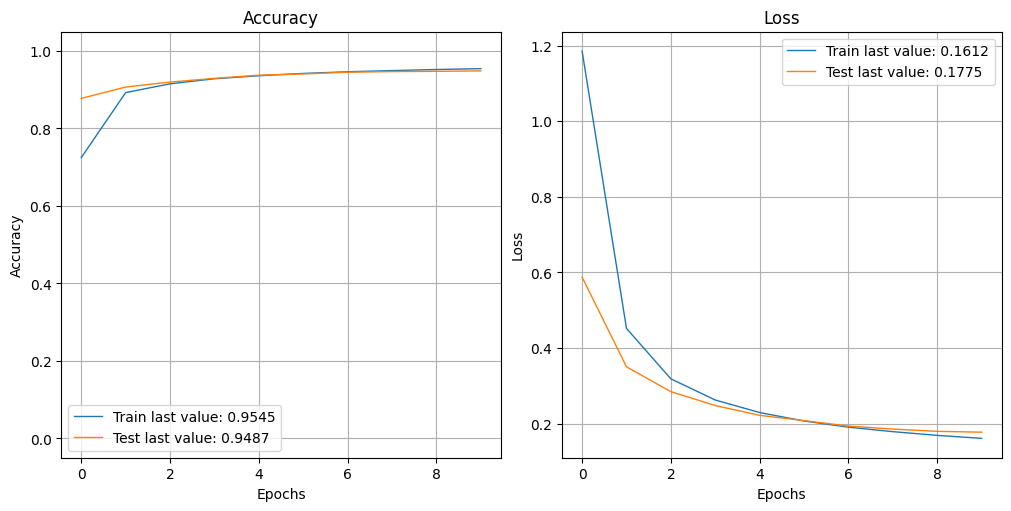

In [11]:
lr_nn_experiment(x_train, y_train, x_test, y_test, lr=0.01)

Epoch 1/10
1821/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.5208 - loss: 1.6954

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.5262 - loss: 1.6816 - val_accuracy: 0.8600 - val_loss: 0.6008
Epoch 2/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8719 - loss: 0.5344

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8720 - loss: 0.5341 - val_accuracy: 0.9024 - val_loss: 0.3600
Epoch 3/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9072 - loss: 0.3466

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9072 - loss: 0.3465 - val_accuracy: 0.9206 - val_loss: 0.2862
Epoch 4/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9248 - loss: 0.2738

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9248 - loss: 0.2738 - val_accuracy: 0.9298 - val_loss: 0.2511
Epoch 5/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9348 - loss: 0.2342

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.9348 - loss: 0.2342 - val_accuracy: 0.9343 - val_loss: 0.2291
Epoch 6/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9387 - loss: 0.2197

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.9387 - loss: 0.2197 - val_accuracy: 0.9396 - val_loss: 0.2136
Epoch 7/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9446 - loss: 0.1975

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9446 - loss: 0.1975 - val_accuracy: 0.9415 - val_loss: 0.2051
Epoch 8/10
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9472 - loss: 0.1871

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9473 - loss: 0.1870 - val_accuracy: 0.9434 - val_loss: 0.2038
Epoch 9/10
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9507 - loss: 0.1692

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9507 - loss: 0.1693 - val_accuracy: 0.9471 - val_loss: 0.1896
Epoch 10/10
1761/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9518 - loss: 0.1709

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9519 - loss: 0.1706 - val_accuracy: 0.9499 - val_loss: 0.1837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 - 0s - 237us/step - accuracy: 0.9499 - loss: 0.1837
Test accuracy: 94.99%
1875/1875 - 0s - 205us/step - accuracy: 0.9559 - loss: 0.1555
Train accuracy: 95.59%


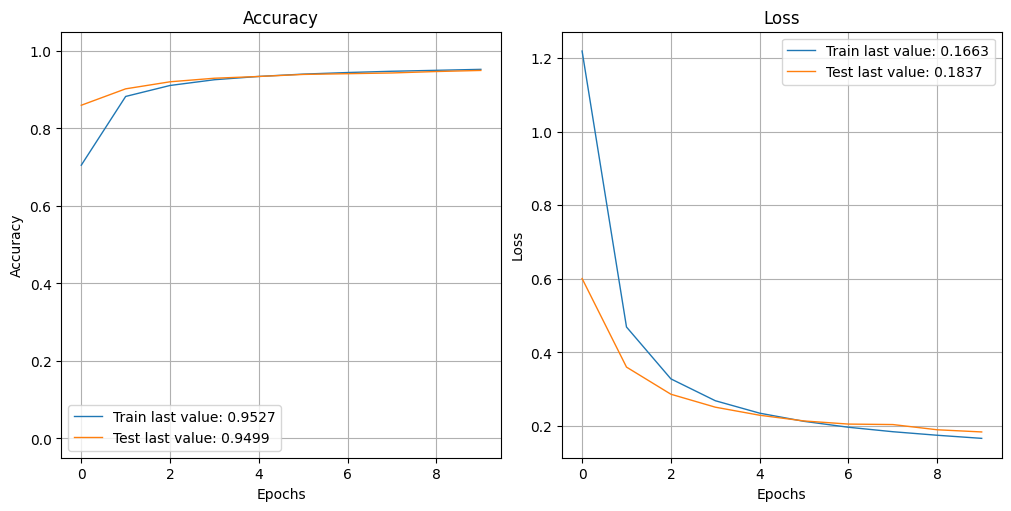

In [12]:
momentum_nn_experiment(x_train, y_train, x_test, y_test)

Epoch 1/10
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.2122 - loss: 2.3065

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2144 - loss: 2.3038 - val_accuracy: 0.4323 - val_loss: 2.0235
Epoch 2/10
 58/118 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.4509 - loss: 1.9941

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4643 - loss: 1.9575 - val_accuracy: 0.5760 - val_loss: 1.7498
Epoch 3/10
110/118 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6048 - loss: 1.6921

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6069 - loss: 1.6872 - val_accuracy: 0.6950 - val_loss: 1.4930
Epoch 4/10
 59/118 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.6970 - loss: 1.4660

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7056 - loss: 1.4378 - val_accuracy: 0.7663 - val_loss: 1.2650
Epoch 5/10
 59/118 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.7754 - loss: 1.2486

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7807 - loss: 1.2224 - val_accuracy: 0.8187 - val_loss: 1.0683
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8209 - loss: 1.0303

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 1.0300 - val_accuracy: 0.8465 - val_loss: 0.9032
Epoch 7/10
 60/118 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8439 - loss: 0.8927

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.8730 - val_accuracy: 0.8619 - val_loss: 0.7675
Epoch 8/10
 59/118 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8600 - loss: 0.7559

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.7424 - val_accuracy: 0.8767 - val_loss: 0.6597
Epoch 9/10
 59/118 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8764 - loss: 0.6449

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.6355 - val_accuracy: 0.8849 - val_loss: 0.5727
Epoch 10/10
 60/118 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8854 - loss: 0.5623

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8863 - loss: 0.5547 - val_accuracy: 0.8932 - val_loss: 0.5045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 - 0s - 245us/step - accuracy: 0.8932 - loss: 0.5045
Test accuracy: 89.32%
1875/1875 - 0s - 209us/step - accuracy: 0.8925 - loss: 0.5040
Train accuracy: 89.25%


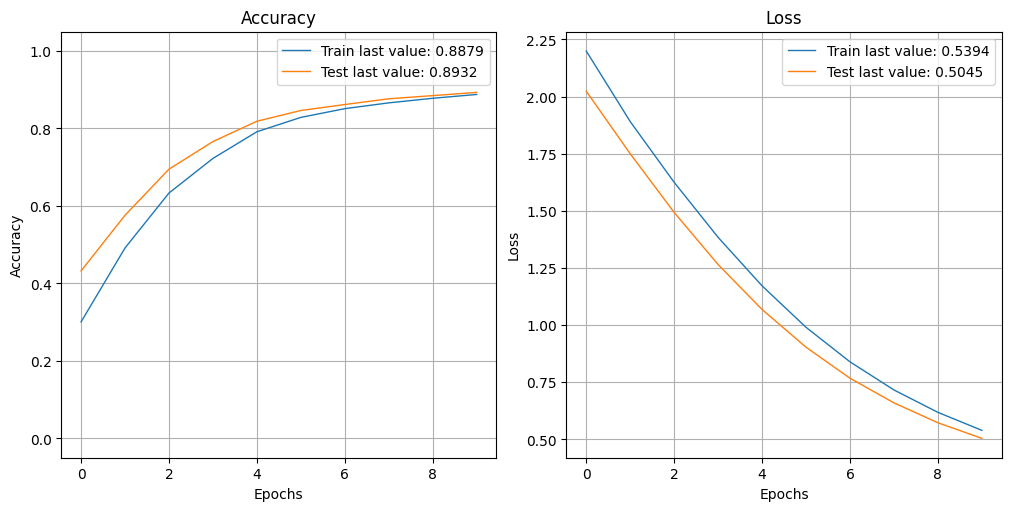

In [13]:
mini_batch_sgd_experiment(x_train, y_train, x_test, y_test)